![giskard_logo.png](https://raw.githubusercontent.com/Giskard-AI/giskard/main/readme/Logo_full_darkgreen.png)

# About Giskard

Open-Source CI/CD platform for ML teams. Deliver ML products, better & faster. 

*   Collaborate faster with feedback from business stakeholders.
*   Deploy automated tests to eliminate regressions, errors & biases.

🏡 [Website](https://giskard.ai/)

📗 [Documentation](https://docs.giskard.ai/)

## Installing `giskard`

In [ ]:
!pip install giskard

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 KB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 K

## Connect the external worker in daemon mode

In [ ]:
!giskard worker start -d

2023-02-24 12:19:42,921 pid:430 MainThread giskard.cli  INFO     Starting ML Worker client daemon
2023-02-24 12:19:42,922 pid:430 MainThread giskard.cli  INFO     Python: /usr/bin/python3 (3.8.10)
2023-02-24 12:19:42,922 pid:430 MainThread giskard.cli  INFO     Giskard Home: /root/giskard-home
2023-02-24 12:19:42,922 pid:430 MainThread giskard.cli_utils INFO     Writing logs to /root/giskard-home/run/ml-worker.log


# Start by creating an ML model 🚀🚀🚀

Let's create a credit scoring Model using the German Credit scoring dataset [(Link](https://github.com/Giskard-AI/giskard-client/tree/main/sample_data/classification) to download the dataset)

In [2]:
import pandas as pd

from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
# To download and read the credit scoring dataset
url = 'https://raw.githubusercontent.com/Giskard-AI/examples/main/datasets/credit_scoring_classification_model_dataset/german_credit_prepared.csv'
credit = pd.read_csv(url, sep=',',engine="python") #To download go to https://github.com/Giskard-AI/giskard-client/tree/main/sample_data/classification

In [4]:
credit

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_employment_since,installment_as_income_perc,sex,...,present_residence_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,Not default,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,Default,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,Not default,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,Not default,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,Default,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Not default,no checking account,12,existing credits paid back duly till now,radio/television,1736,... < 100 DM,4 <= ... < 7 years,3,female,...,4,real estate,31,none,own,1,unskilled - resident,1,none,yes
996,Not default,< 0 DM,30,existing credits paid back duly till now,car (used),3857,... < 100 DM,1 <= ... < 4 years,4,male,...,4,if not A121 : building society savings agreeme...,40,none,own,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
997,Not default,no checking account,12,existing credits paid back duly till now,domestic appliances,804,... < 100 DM,.. >= 7 years,4,male,...,4,"if not A121/A122 : car or other, not in attrib...",38,none,own,1,skilled employee / official,1,none,yes
998,Default,< 0 DM,45,existing credits paid back duly till now,domestic appliances,1845,... < 100 DM,1 <= ... < 4 years,4,male,...,4,unknown / no property,23,none,for free,1,skilled employee / official,1,"yes, registered under the customers name",yes


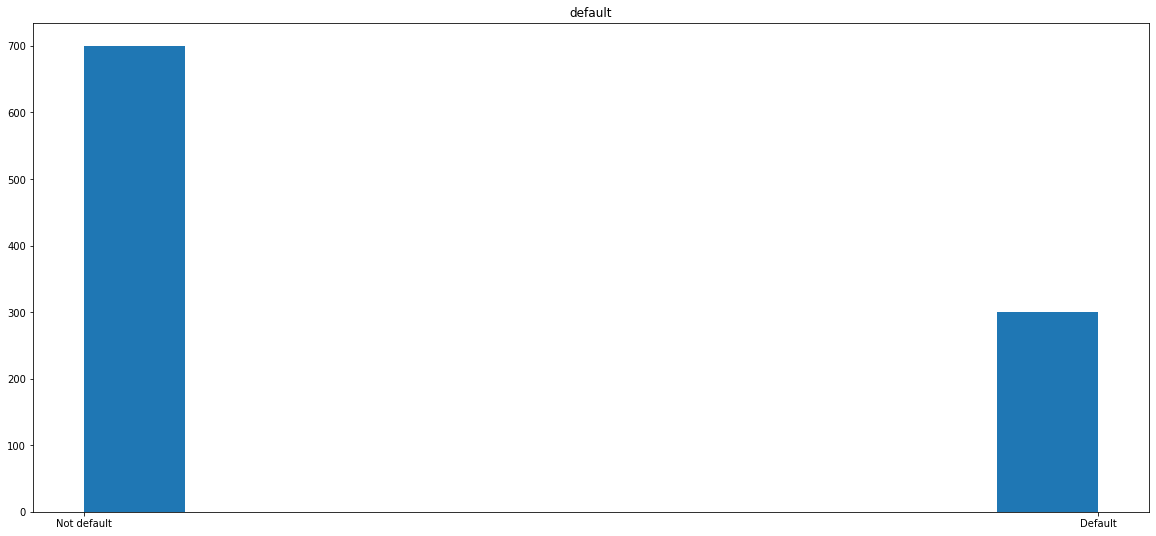

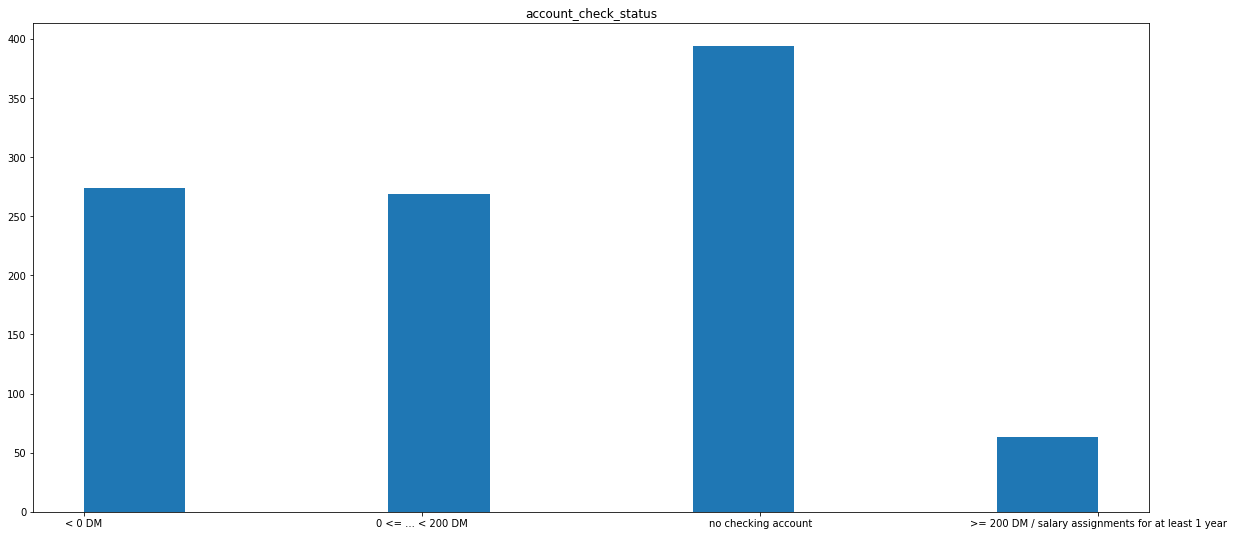

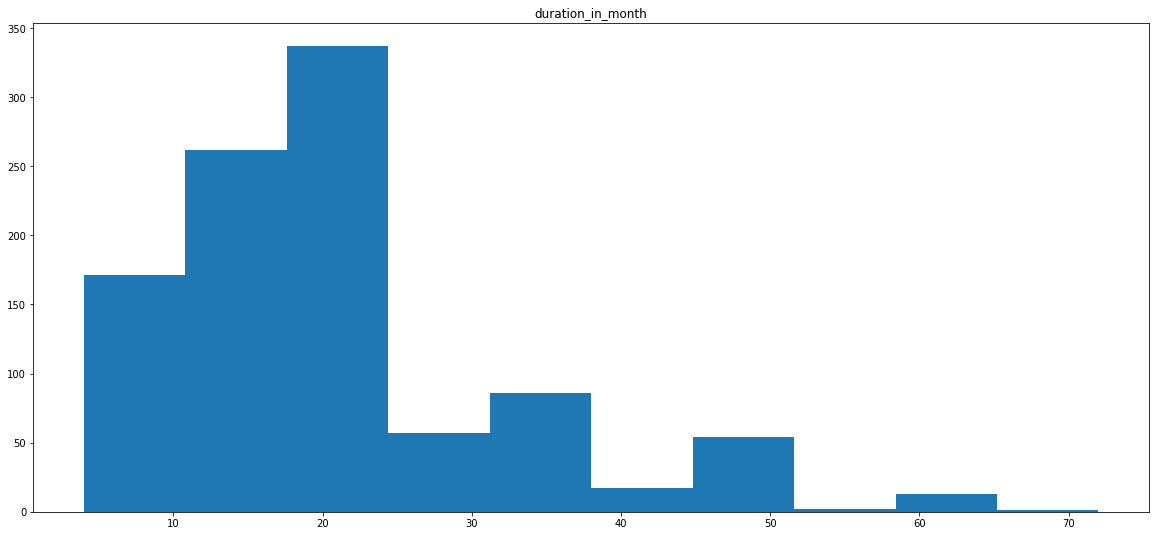

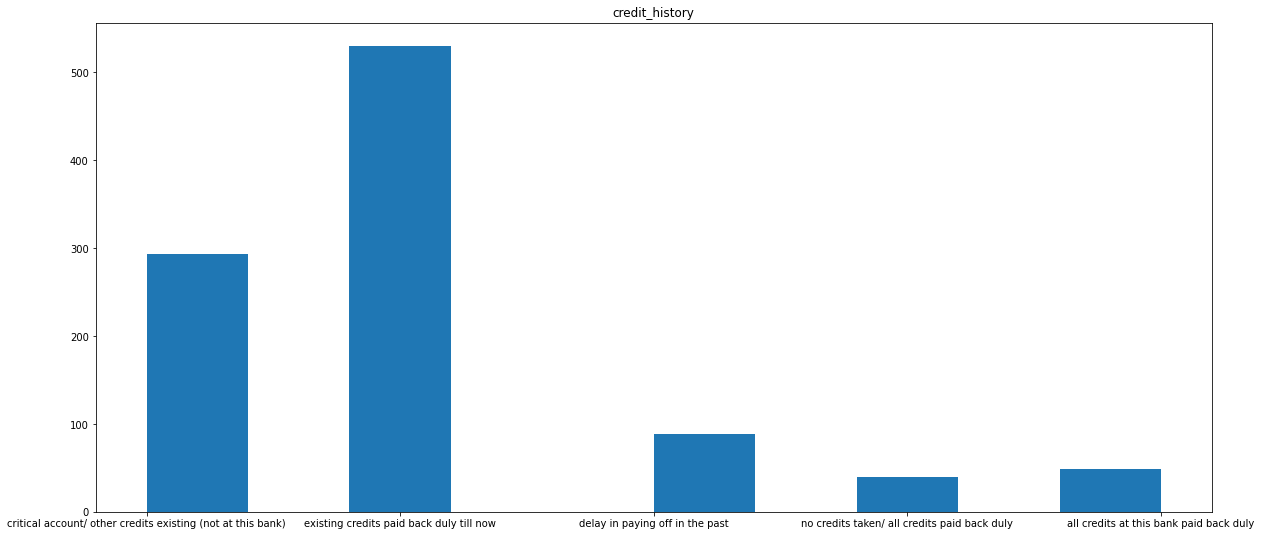

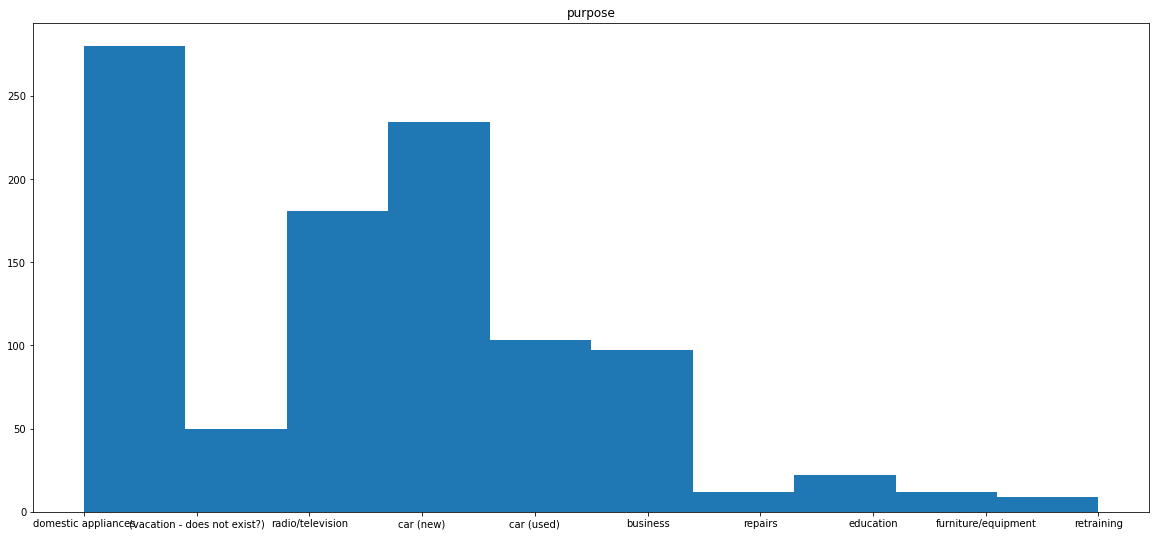

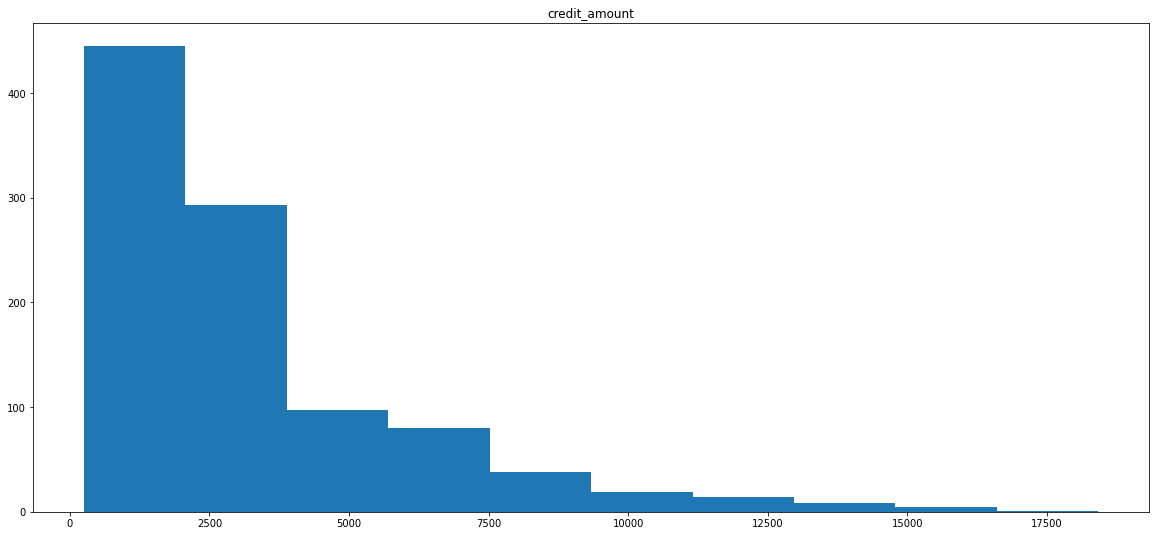

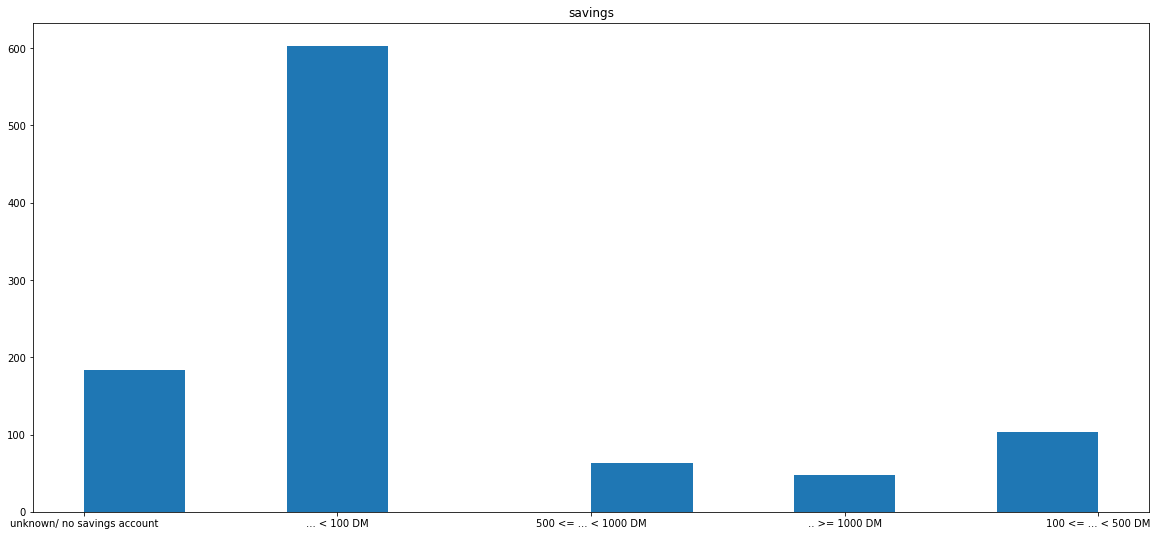

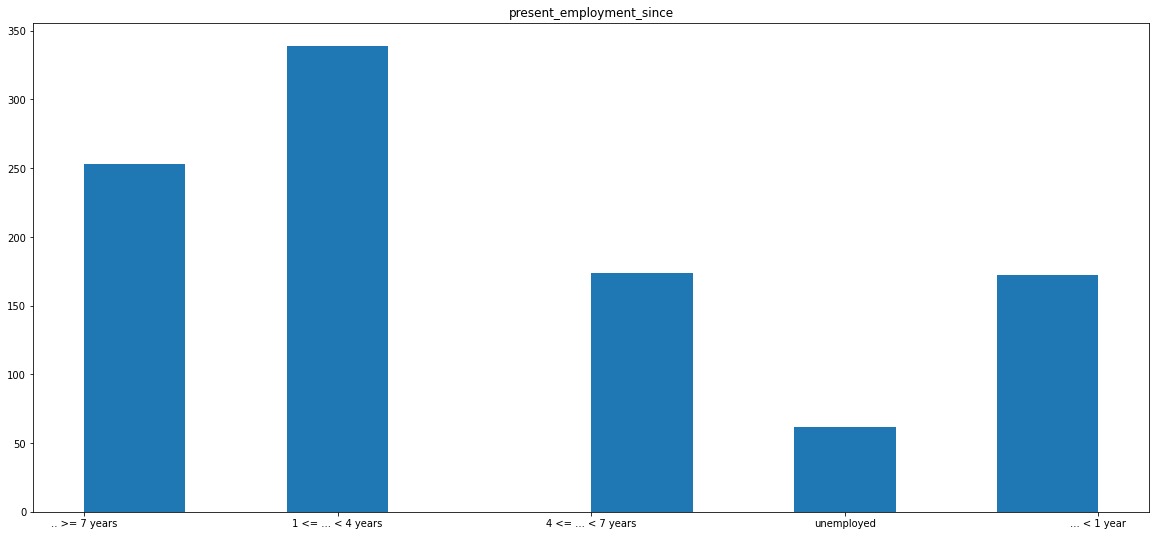

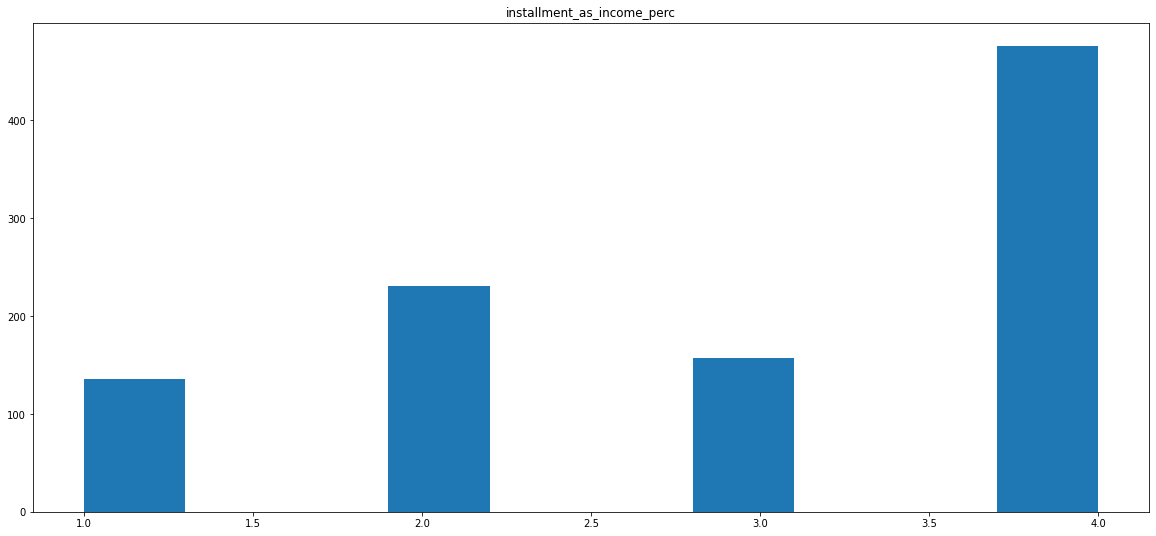

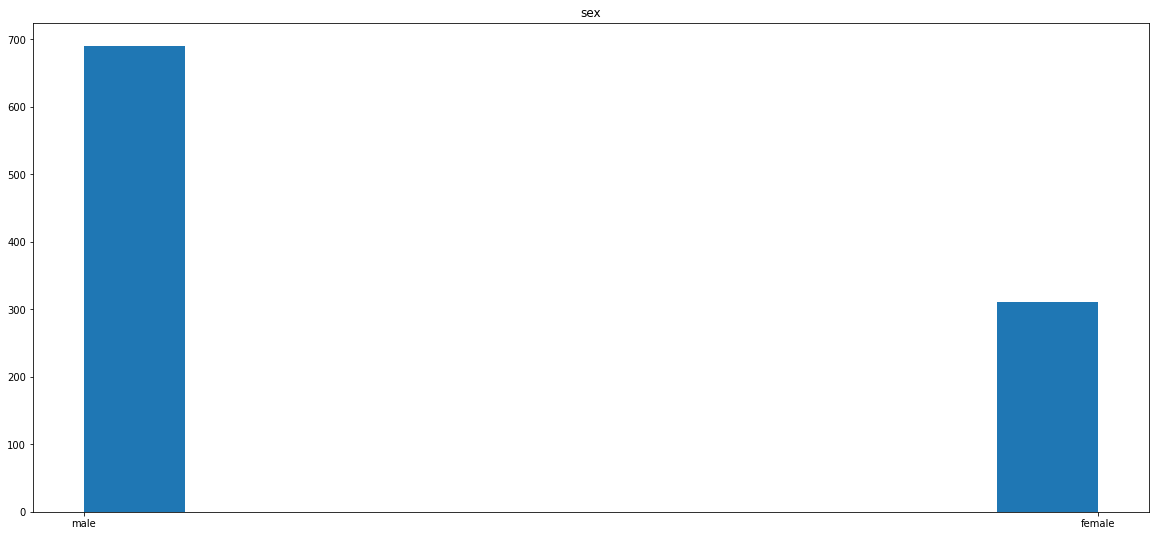

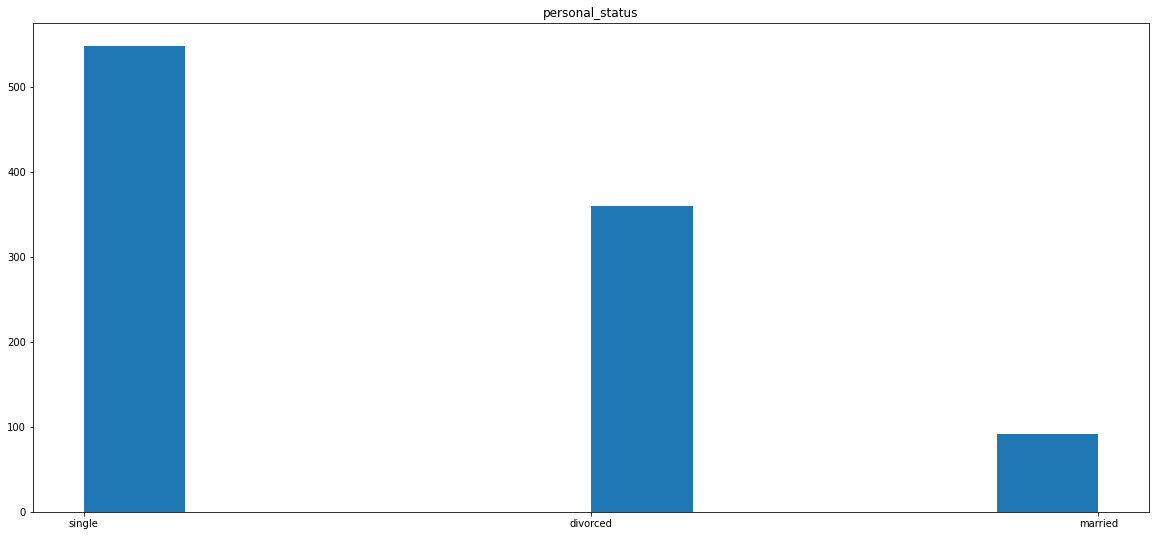

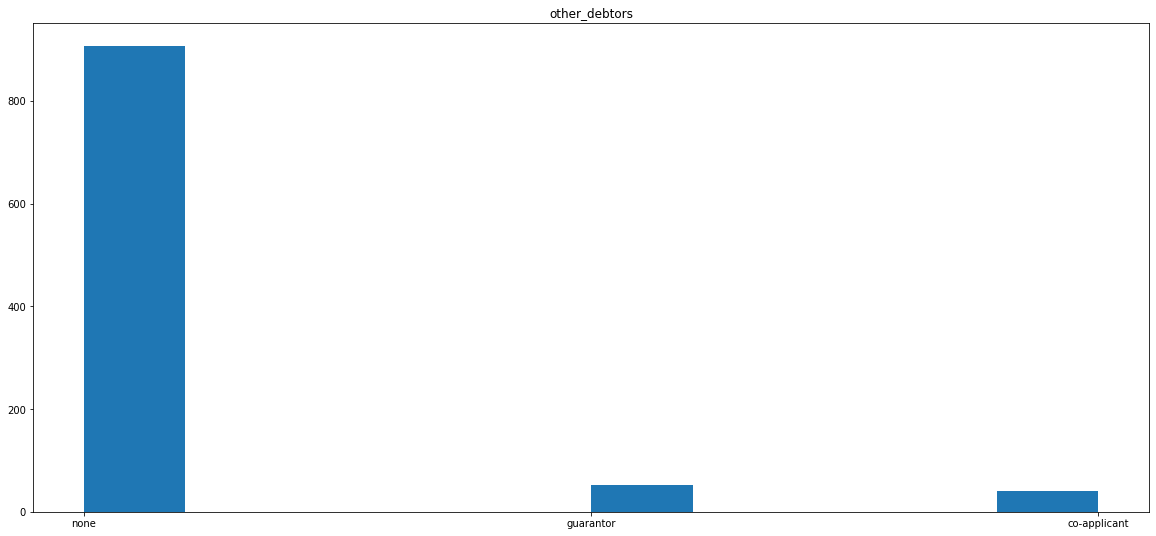

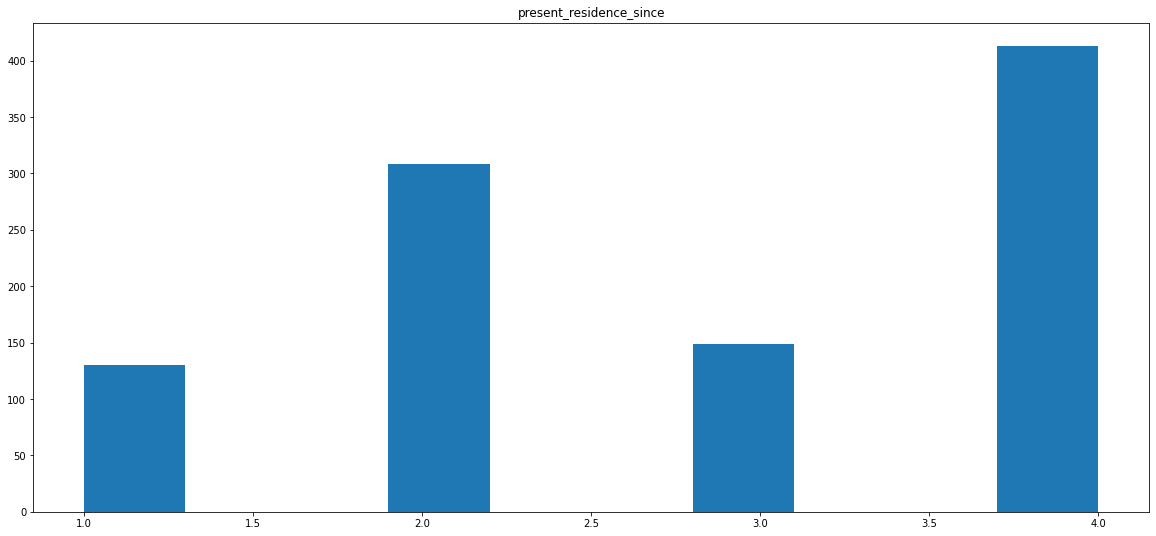

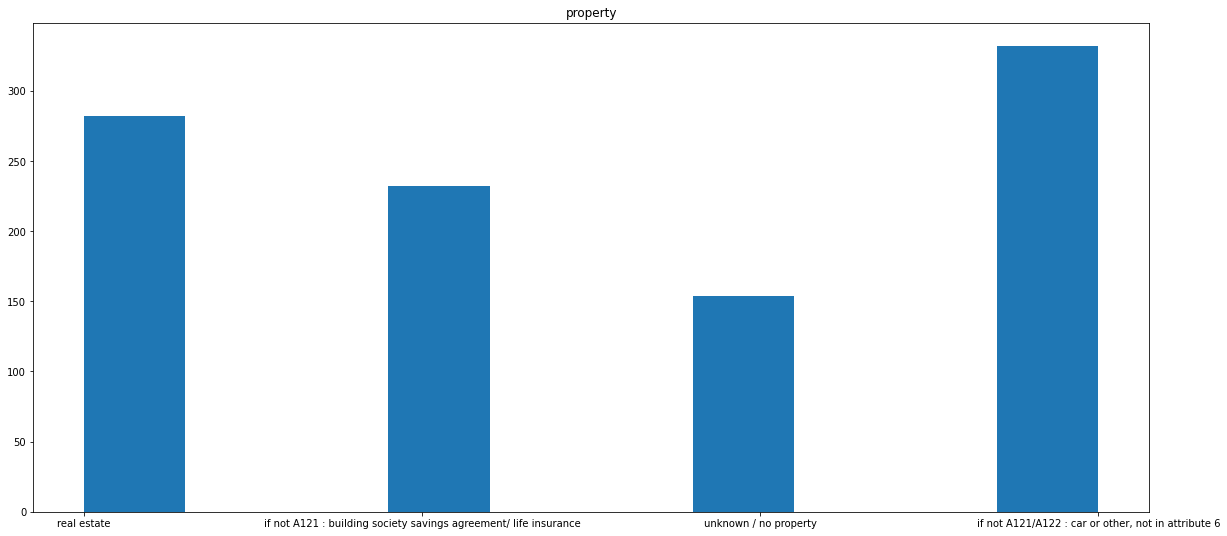

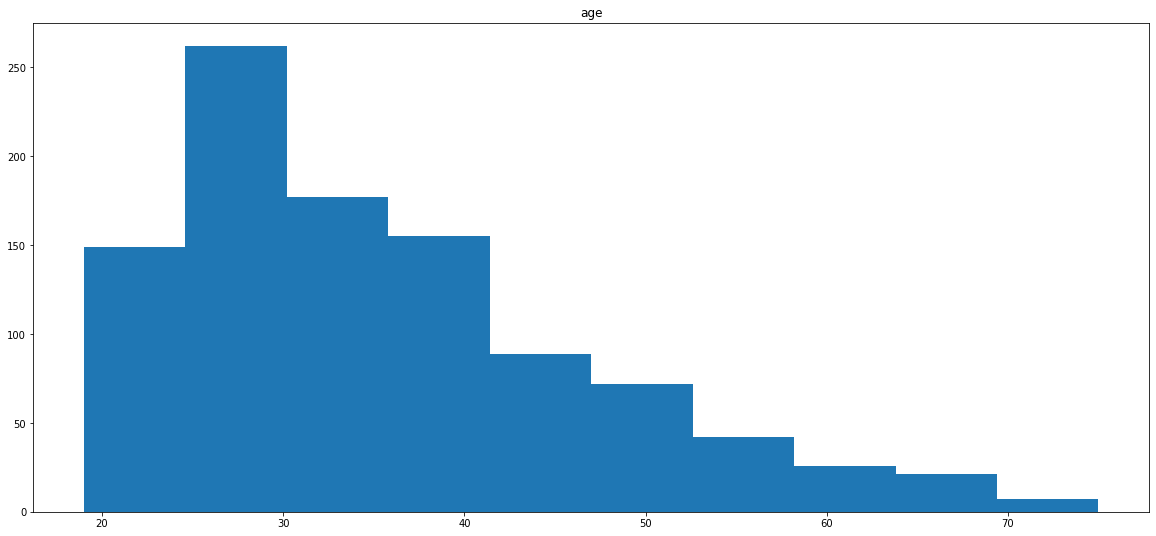

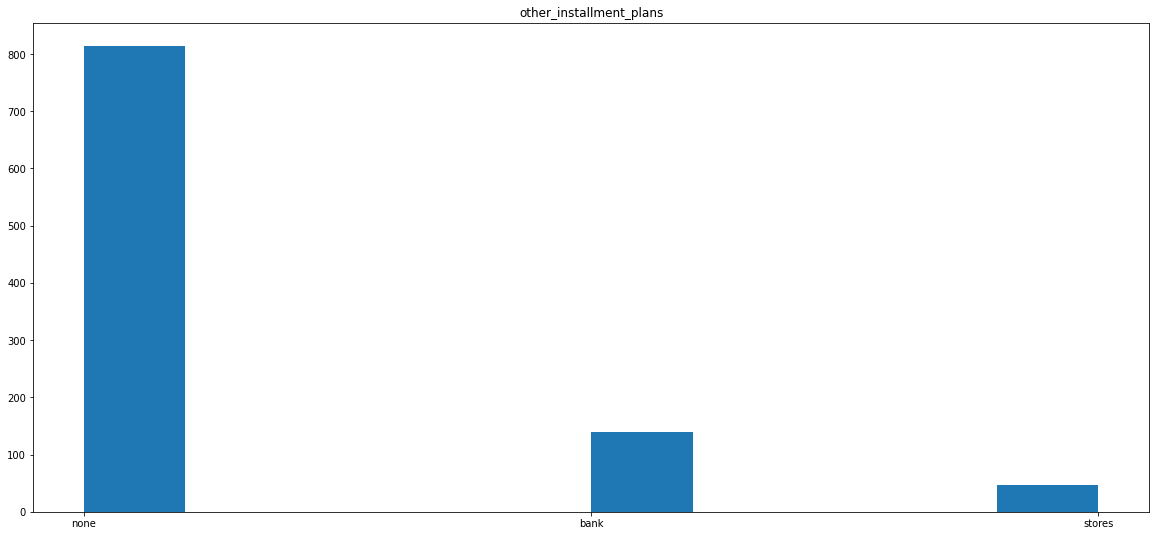

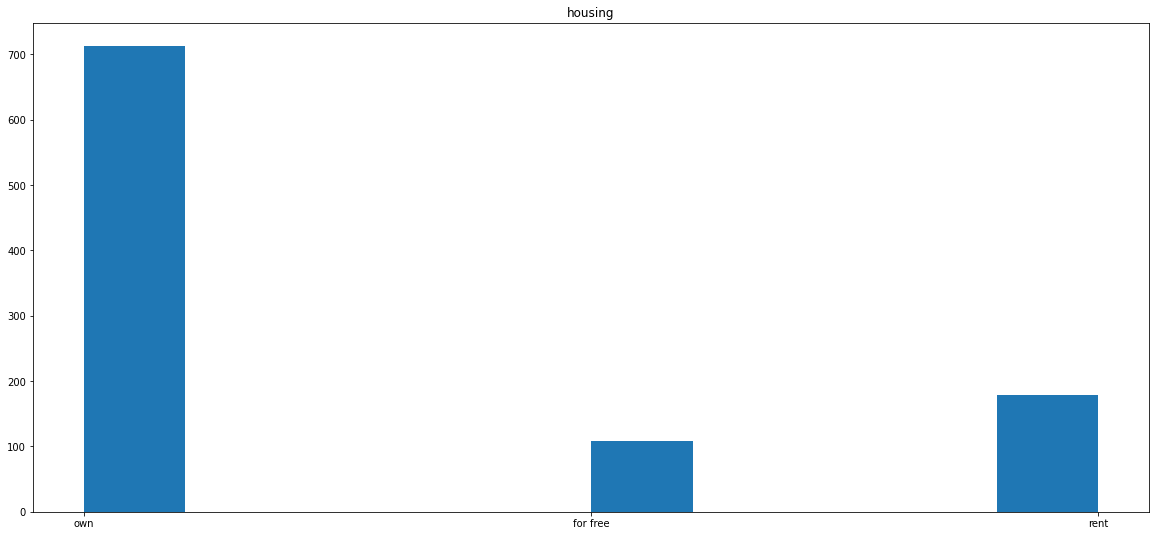

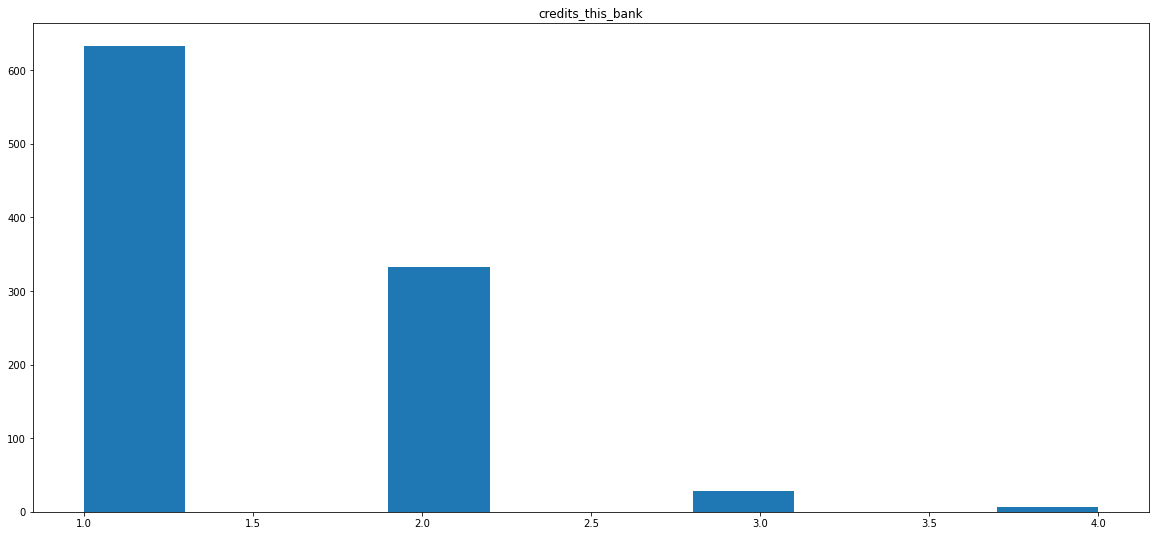

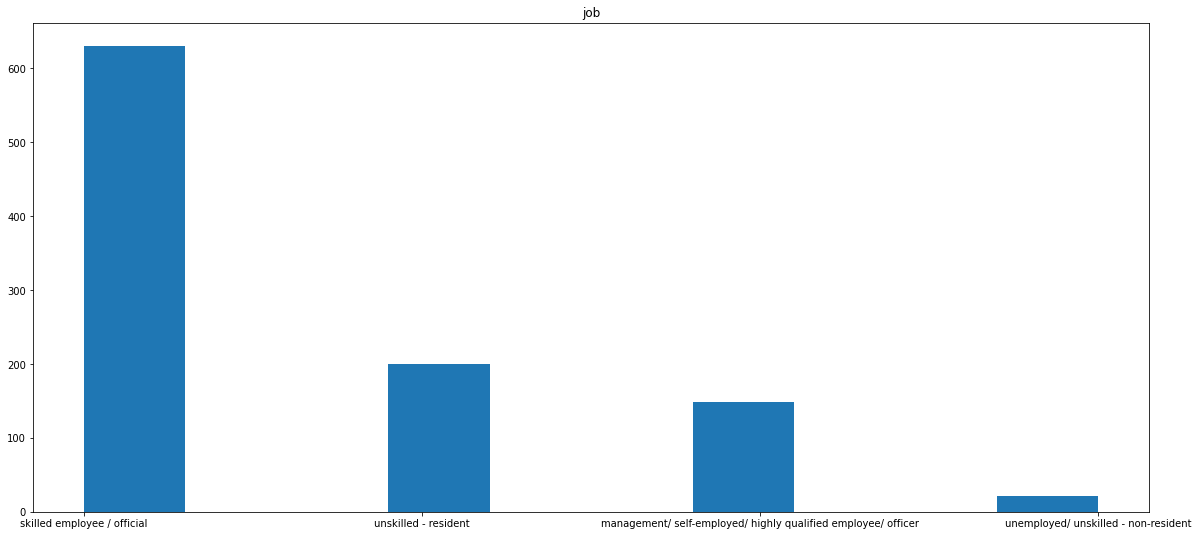

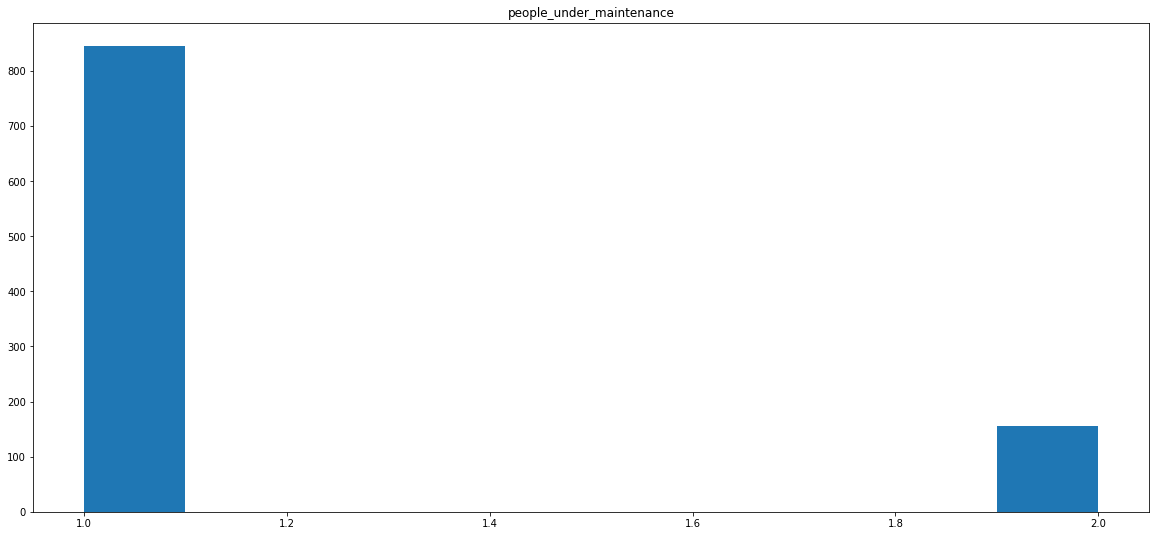

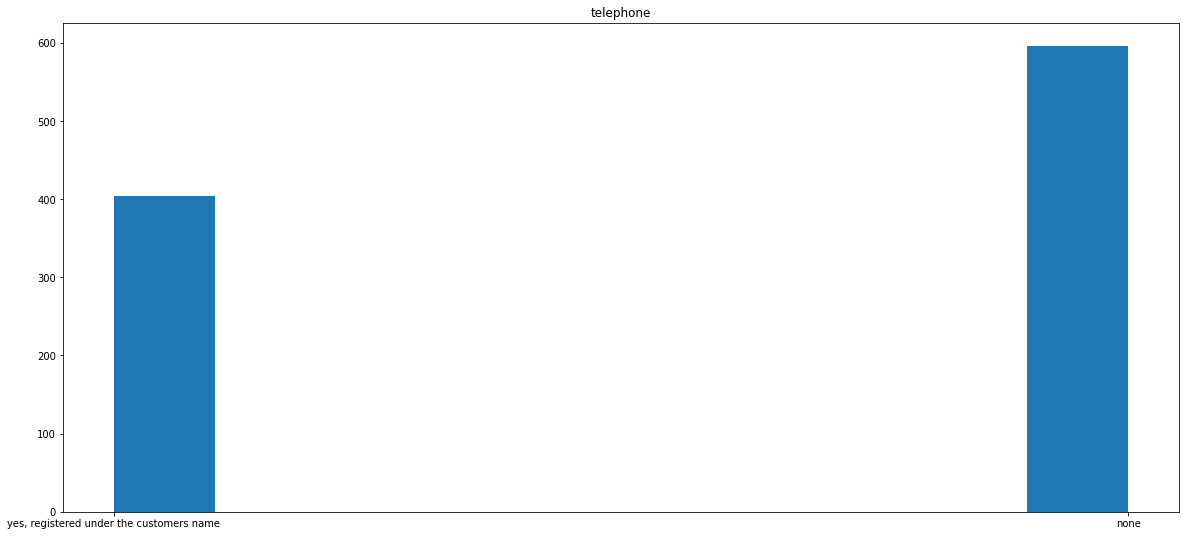

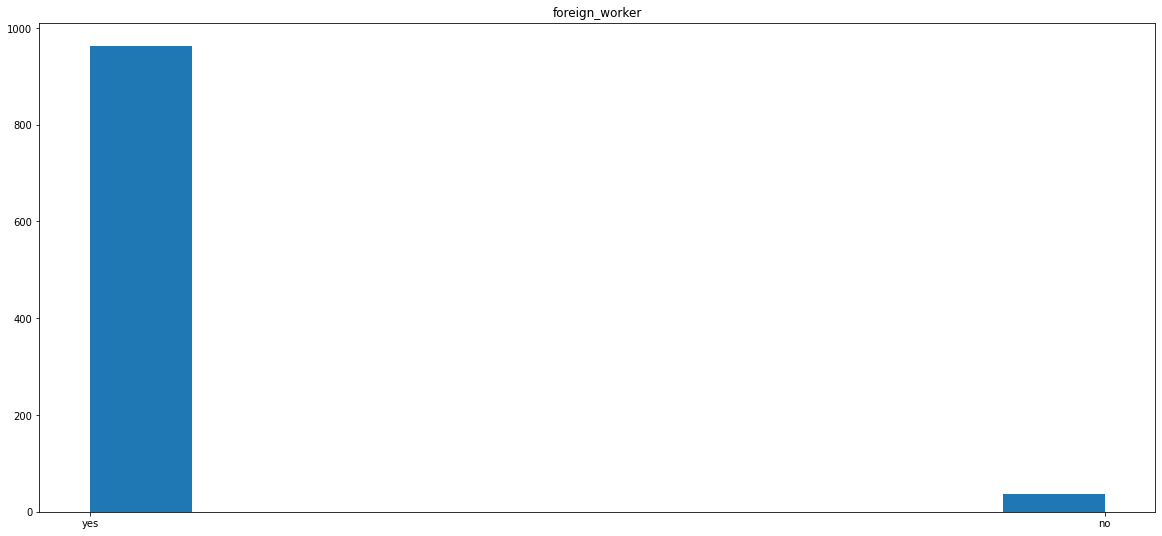

In [5]:
import matplotlib.pyplot as plt

# Loop over each column in the DataFrame and create a histogram
for col in credit.columns:
    plt.figure(figsize=(20, 9))
    plt.hist(credit[col])
    plt.title(col)
    plt.show()

In [6]:
# Declare the type of each column in the dataset(example: category, numeric, text)
column_types = {'default':"category",
               'account_check_status':"category", 
               'duration_in_month':"numeric",
               'credit_history':"category",
               'purpose':"category",
               'credit_amount':"numeric",
               'savings':"category",
               'present_employment_since':"category",
               'installment_as_income_perc':"numeric",
               'sex':"category",
               'personal_status':"category",
               'other_debtors':"category",
               'present_residence_since':"numeric",
               'property':"category",
               'age':"numeric",
               'other_installment_plans':"category",
               'housing':"category",
               'credits_this_bank':"numeric",
               'job':"category",
               'people_under_maintenance':"numeric",
               'telephone':"category",
               'foreign_worker':"category"}

In [7]:
from sklearn.preprocessing import PowerTransformer, OrdinalEncoder

In [371]:
# feature_types is used to declare the features the model is trained on
feature_types = {i:column_types[i] for i in column_types if i!='default'}

# Pipeline to fill missing values, transform and scale the numeric columns
columns_to_scale = [key for key in feature_types.keys() if feature_types[key]=="numeric"]
numeric_transformer = Pipeline([('imputer', SimpleImputer(strategy='median', add_indicator=True)),
    ('scaler', StandardScaler())])

# Pipeline to fill missing values and one hot encode the categorical values
columns_to_encode = [key for key in feature_types.keys() if feature_types[key]=="category"]
categorical_transformer = Pipeline([
        #('imputer', SimpleImputer(strategy='constant', fill_value='missing', add_indicator=True)),
        ('onehot', OneHotEncoder(handle_unknown='ignore',sparse=False)) ])

# Perform preprocessing of the columns with the above pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, columns_to_scale),
      ('cat', categorical_transformer, columns_to_encode)
          ]
)

# Pipeline for the model Logistic Regression
clf_logistic_regression = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(max_iter =1000))])

# Split the data into train and test
Y=credit['default']
X= credit.drop(columns="default")
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.20,random_state = 30, stratify = Y)

# Fit and score your model
clf_logistic_regression.fit(X_train, Y_train)
clf_logistic_regression.score(X_test, Y_test)

0.755

In [372]:
preprocessor.fit(X_train, Y_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(add_indicator=True,
                                                                strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['duration_in_month', 'credit_amount',
                                  'installment_as_income_perc',
                                  'present_residence_since', 'age',
                                  'credits_this_bank',
                                  'people_under_maintenance']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['account_check_status

In [373]:
X_train['default'] = Y_train

In [374]:
df = X_train

In [375]:
import pandas as pd
import numpy as np

from sklearn.mixture import GaussianMixture as GMM

# pandas dataframe df has a column credit_history
# we will extract unique classes from
arr_classes = np.sort(df.default.unique())

# new we train a unique gmm for each class
# and save results in a dictionary
gmms = dict()
for cls in arr_classes:
    print('class', cls)
    
    # extract samples for the class and convert to numpy
    # and remove the class label which is the last column in the dataframe
    x_train = df[df['default'] == cls]
    x_train = x_train.drop(columns="default")
    
    # train gmm, extract results, and save in dictionary
    gmm = GMM(n_components=1, covariance_type = 'full').fit(preprocessor.transform(x_train))
    gmms[cls] = (gmm.means_, gmm.covariances_)

class Default
class Not default


In [376]:

#2 a couple of additional imports
import numpy.linalg as lnalg
from scipy.spatial.distance import mahalanobis

# first we will calculate average MD distance for each class
# we will use it later for a saliency check

for cls in arr_classes:
    # let's randomly select 1000 samples
    sub_sample = df[df['default']==cls].sample(frac=1)
    sub_sample = sub_sample.drop(columns="default")
    sub_sample = preprocessor.transform(sub_sample)[:1000, :]
    
    mh = np.empty((sub_sample.shape[0]))
    mu, sig = gmms[cls]
    # we have to invert the matrix for mahalanobis calc
    isig = lnalg.inv(sig)
    
    for i in range(sub_sample.shape[0]):
        mh[i] = mahalanobis(sub_sample[i], mu, isig)
        
    print('class', cls, 'mean', mh.mean())

class Default mean 6.770841853065254
class Not default mean 6.734894314845665


In [377]:
cls_to_int = {arr_classes[i] : i for i in range(len(arr_classes))}

In [378]:
cls_to_int

{'Default': 0, 'Not default': 1}

In [379]:

# 3 NOTE: for performance this should be coded as vectorized set operations
# here using loops for clarity

inv_sig = dict()
mh = np.zeros((arr_classes.shape[0]))

smpls = df.sample(frac=1)[:500]
x = preprocessor.transform(smpls.drop(columns="default")) # smpls[:, :-1]
labels = smpls["default"].to_numpy()#preprocessor.named_transformers_['cat'].transform(smpls["default"].values.reshape(-1, 1)) # smpls[:, -1:]

results = np.zeros(x.shape[0])

# let's invert all sigmas from GMMs
for cls in arr_classes:
    mu, sig = gmms[cls]
    isig = lnalg.inv(sig)
    inv_sig[cls] = mu, isig

for i in range(x.shape[0]):
    for cls in arr_classes:
        mu, isig = inv_sig[cls]
        mh[cls_to_int[cls]] = mahalanobis(x[i], mu, isig)
       
    # if gmm prediction matches the original class label let's save the result
    if np.argmin(mh) == cls_to_int[labels[i]]: #labels[i]:
        results[i] = 1
        
# let's calculate simple accuracy: True / All Samples
acc = results.sum() / results.shape[0]

print('Accuracy:', acc)
if acc > .9: print('Doing well')

Accuracy: 0.834


In [380]:
#4 calculate the number of entities to add to each underepresented class
# we actually generate twice as many since some of these will shift to different
# classes by virtue of instability of categorical data
# we will later select only the required percentage
cnts = {key : 140 for key in list(cls_to_int.keys())}

# NOTE: let's create a list of categorical columns so we can normalize
# them to 0 and 1 values after synthesizing new data

x = preprocessor.transform(df.drop(columns="default"))
#labels = np.array([cls_to_int[label] for label in df["default"].to_numpy()]) 

cols_num = x.shape[1]
# Get the unique values of each column
unique_vals = [np.unique(x[:, i]) for i in range(x.shape[1])]
# let's see how many unique values each column has
cat_columns = [np.array_equal(col, [0, 1]) for col in unique_vals] # MB sort col

# generate a new distribution for each column and class
new_class_arrays = []

for cls in arr_classes:
    dlt = cnts[cls]#int(cnts[cnts['default']==cls]['delta'])
    if dlt <=0: continue
        
    #desc_df = df[df['default']==cls].describe()
    
    sub_arr = np.zeros((dlt, cols_num, 1))
    
    col_counter = 0
    for col in range(cols_num):
        sub_arr[:, col_counter] = np.random.normal(loc=np.mean(x[:,col]),#desc_df[col]['mean'], 
                                                   scale=np.std(x[:,col]),#desc_df[col]['std'], 
                                                   size= (dlt, 1),

                                                  )
        col_counter += 1
    new_class_arrays.append(sub_arr)

new_samples = np.concatenate(new_class_arrays)

# now that we have our new samples let's convert the purturbed columns back
# to categorical columns using the list that we have created above

c_idx = 0
for c in cat_columns:
    if c == True:
        # get slices, thee original label then either discard or re-assign
    # we are going to re-assign the classn update them which updates the parent array
        s = new_samples[:, c_idx, :]
        s[s < .5] = 0
        s[s >=.5] = 1
        new_samples[:, c_idx, :] = s
    c_idx +=1

In [381]:
np.array([cls_to_int[label] for label in df["default"].to_numpy()]).shape

(800,)

In [382]:
x.shape

(800, 62)

In [383]:
min_dist = 0.0005

In [384]:
#5 iterate through samples and confirm class assignment or re-assign
x = new_samples
labels = np.zeros(x.shape[0]) #labels = np.array([cls_to_int[label] for label in df["default"].to_numpy()]) 
results = np.ones(x.shape[0])

for i in range(x.shape[0]):
    for cls in arr_classes:
        mu, isig = inv_sig[cls]
        mh[cls_to_int[cls]] = mahalanobis(x[i], mu, isig)
       
    # if gmm assignment is not the same as the original label then either discard or re-assign
    #if np.argmin(mh) != cls_to_int[labels[i]]:
    labels[i] = np.argmin(mh)
    if abs(mh[0] - mh[1]) < min_dist:
        results[i] = 0
        
#then concat labels and new samples, turn into a dataframe, concat with original and train.
labels

array([1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 0.

In [385]:
x = x[results.astype(bool)]
labels = labels[results.astype(bool)]


In [386]:
cat_data = x.reshape((-1, 62))[:, cat_columns]
num_data = x.reshape((-1, 62))[:, [not col for col in cat_columns]]

In [387]:
num_data = preprocessor.named_transformers_['num'].inverse_transform(num_data)

In [388]:
names = []
for transformer in preprocessor.transformers:
    names = np.concatenate((names, transformer[-1]))

In [389]:
names = np.insert(names, 0, "default")

In [390]:
cat_data = preprocessor.named_transformers_['cat'].inverse_transform(cat_data)

In [391]:
int_to_cls = {v: k for k, v in cls_to_int.items()}

In [392]:
labels = np.array([int_to_cls[label] for label in labels])

In [393]:
num_data.shape

(256, 7)

In [394]:
data_data = np.concatenate((num_data, cat_data), axis=1)

In [395]:
np.concatenate((labels.reshape(-1, 1), data_data), axis=1)

array([['Not default', 25.162811454430994, 2324.487737200749, ...,
        'skilled employee / official', None, 'yes'],
       ['Default', 3.445047677632484, 5114.758388768454, ...,
        'skilled employee / official', None, 'yes'],
       ['Not default', 23.990421662613677, 5200.49613700382, ..., None,
        'none', 'yes'],
       ...,
       ['Default', 27.35448898858956, 9484.979071691221, ...,
        'skilled employee / official', None, 'yes'],
       ['Default', 39.61458402711796, 5469.949199570583, ...,
        'skilled employee / official', 'none', 'yes'],
       ['Default', 5.4211592885770745, 572.4169414691346, ..., None,
        'none', 'yes']], dtype=object)

In [396]:
new_data = pd.DataFrame(data=np.concatenate((labels.reshape(-1, 1), data_data), axis=1), columns=names)

In [397]:
from sklearn.utils import shuffle

In [398]:
# Split the data into train and test
augmented_credit = credit.append(new_data, ignore_index = True)
Y=credit['default']
X= credit.drop(columns="default")
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.20,random_state = 30, stratify = Y)
X_train, Y_train = shuffle(X_train.append(new_data.drop(columns="default"), ignore_index = True), Y_train.append(new_data['default'], ignore_index = True), random_state=30)

# Fit and score your model
clf_logistic_regression.fit(X_train, Y_train)
clf_logistic_regression.score(X_test, Y_test)

0.785

In [370]:
# Prepare data to upload on Giskard
train_data = pd.concat([X_train, Y_train], axis=1)
test_data = pd.concat([X_test, Y_test ], axis=1)

# Upload the model in Giskard 🚀🚀🚀

### Initiate a project

In [ ]:
from giskard import GiskardClient

url = "http://localhost:19000" #if Giskard is installed locally (for installation, see: https://docs.giskard.ai/start/guides/installation)
#url = "http://app.giskard.ai" # If you want to upload on giskard URL
token = "YOUR GENERATED TOKEN" #you can generate your API token in the Admin tab of the Giskard application (for installation, see: https://docs.giskard.ai/start/guides/installation)

client = GiskardClient(url, token)

# your_project = client.create_project("project_key", "PROJECT_NAME", "DESCRIPTION")
# Choose the arguments you want. But "project_key" should be unique and in lower case
credit_scoring = client.create_project("credit_scoring", "German Credit Scoring", "Project to predict if user will default")

# If you've already created a project with the key "credit-scoring" use
#credit_scoring = client.get_project("credit_scoring")


### Upload your model and a dataset (see [documentation](https://docs.giskard.ai/start/guides/upload-your-model))

In [ ]:
credit_scoring.upload_model_and_df(
    prediction_function=clf_logistic_regression.predict_proba, # Python function which takes pandas dataframe as input and returns probabilities for classification model OR returns predictions for regression model
    model_type='classification', # "classification" for classification model OR "regression" for regression model
    df=test_data, # the dataset you want to use to inspect your model
    column_types=column_types, # A dictionary with columns names of df as key and types(category, numeric, text) of columns as values
    target='default', # The column name in df corresponding to the actual target variable (ground truth).
    feature_names=list(feature_types.keys()), # List of the feature names of prediction_function
    classification_labels=clf_logistic_regression.classes_ ,  # List of the classification labels of your prediction
    model_name='logistic_regression_v1', # Name of the model
    dataset_name='test_data' # Name of the dataset
)

### 🌟 If you want to upload a dataset without a model






For example, let's upload the train set in Giskard, this is key to create drift tests in Giskard.


In [ ]:
credit_scoring.upload_df(
    df=train_data, # The dataset you want to upload
    column_types=column_types, # All the column types of df
    target="default", # Do not pass this parameter if dataset doesn't contain target column
    name="train_data" # Name of the dataset
)

You can also upload new production data to use it as a validation set for your existing model. In that case, you might not have the ground truth target variable

In [ ]:
production_data = credit.drop(columns="default")

In [ ]:
credit_scoring.upload_df(
    df=production_data, # The dataset you want to upload
    column_types=feature_types, # All the column types without the target
    name="production_data"# Name of the dataset
)

### 🌟 If you just want to upload a model without a dataframe 

This happens for instance when you built a new version of the model and you want to inspect it using a validation dataframe that is already in Giskard

For example, let's create a second version of the model using random forest

In [ ]:
clf_random_forest = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(max_depth=10,random_state=0))])

clf_random_forest.fit(X_train, Y_train)
clf_random_forest.score(X_test, Y_test)

In [ ]:
credit_scoring.upload_model(
    prediction_function=clf_random_forest.predict_proba, # Python function which takes pandas dataframe as input and returns probabilities for classification model OR returns predictions for regression model
    model_type='classification', # "classification" for classification model OR "regression" for regression model
    feature_names=list(feature_types.keys()), # List of the feature names of prediction_function
    name='random_forest', # Name of the model
    validate_df=train_data, # Optional. Validation df is not uploaded in the app, it's only used to check whether the model has the good format
    target="default", # Optional. target should be a column of validate_df. Pass this parameter only if validate_df is being passed
    classification_labels=["Default","Not default"] # List of the classification labels of your prediction

)

### Happy Exploration ! 🧑‍🚀

# Another approaches:

* Generative adversarial networks (GANs)


